In [16]:
import numpy as np
import pandas as pd
adv=[i for i in range(10,31)]
sales=[i for i in range(100,301,10)]
result=[i for i in range(1,4)]*(len(sales)//3)
print(len(adv))
print(len(sales))
print(len(result))
data=pd.DataFrame({"Advertise":adv,"Sales":sales,"Result":result})
data.head()


21
21
21


,Advertise,Sales,Result
0,10,100,1
1,11,110,2
2,12,120,3
3,13,130,1
4,14,140,2


In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
x=data[["Advertise","Sales"]]
y=data["Result"]
model.fit(x,y)

DecisionTreeClassifier()

In [18]:
encode={"1":"Low","2":"High","3":"Average"}
res1=model.predict([[10,100]])
res2=model.predict([[11,110]])
res3=model.predict([[12,120]])

#print(res1,encode[int(res1)])
#print(res1,encode[int(res2)])
#print(res1,encode[int(res3)])
print()
print(model.predict([[10,100]]))
print(model.predict([[11,110]]))
print(model.predict([[12,120]]))


[1]
[2]
[3]


c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: Us

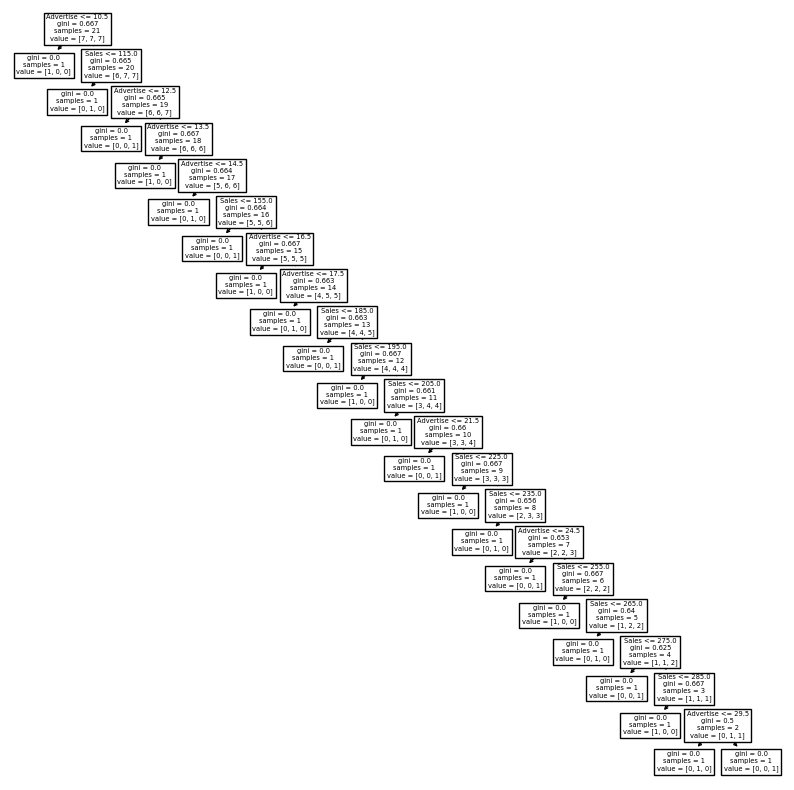

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
tree.plot_tree(model,feature_names=["Advertise","Sales","Result"]) # "Result"
plt.show()

In [20]:
import pickle
f1=open("DT.pkl","wb")
pickle.dump(model,f1)
f1.close()

In [21]:
f2=open("DT.pkl","rb")
model=pickle.load(f2)
adv_pred_value=int(input("Enter value  to predict advertise : "))
sale_pred_value=int(input("Enter value  to predict advertise : "))
new_result=model.predict([[adv_pred_value,sale_pred_value]])
print(f"Sales for {adv_pred_value} and {sale_pred_value} will be {new_result}")

Sales for 10 and 100 will be [1]


c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
from flask import Flask,jsonify
#mport json
from sklearn.tree import DecisionTreeClassifier
app=Flask(__name__)

@app.route("/DT/<advertise>/<sales>",methods=["GET"])
def model_deploy(adv,sale):
        f1=open("dt.pkl","rb")
        model=pickle.load(f1)
        result=model.predict([["advertise","sales"]])
        prediction = model.predict(result)
        return jsonify({'prediction': prediction[0]})

if __name__ == "__main__" :
        app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\KIIT\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
